In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline


#remove unecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Levels_Fyi_Salary_Data.csv")

In [3]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [4]:
df.shape

(62642, 29)

In [5]:
print(df.columns)

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')


In [6]:
salary_df = df[['company','title','totalyearlycompensation','location','yearsofexperience','yearsatcompany','basesalary','Education']]

In [7]:
salary_df.head()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,Education
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,NaN
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,NaN
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,NaN
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,NaN
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,NaN


In [8]:
#add the totalyearlycompensation together with the base salary

total_salary= salary_df['totalyearlycompensation'] +salary_df['basesalary']
salary_df["total_salary"] = total_salary

In [9]:
salary_df.head()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,Education,total_salary
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,NaN,234000.0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,NaN,100000.0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,NaN,465000.0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,NaN,529000.0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,NaN,157000.0


In [10]:
#rename columns
salary_df = salary_df.rename({'yearsofexperience': 'working_experience_years'}, axis=1)

In [11]:
salary_df.head()

,company,title,totalyearlycompensation,location,working_experience_years,yearsatcompany,basesalary,Education,total_salary
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,NaN,234000.0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,NaN,100000.0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,NaN,465000.0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,NaN,529000.0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,NaN,157000.0


In [12]:
salary_df1 = salary_df.copy()
salary_df1.drop(['totalyearlycompensation','basesalary'],axis=1, inplace=True)
salary_df1

,company,title,location,working_experience_years,yearsatcompany,Education,total_salary
0,Oracle,Product Manager,"Redwood City, CA",1.5,1.5,NaN,234000.0
1,eBay,Software Engineer,"San Francisco, CA",5.0,3.0,NaN,100000.0
2,Amazon,Product Manager,"Seattle, WA",8.0,0.0,NaN,465000.0
3,Apple,Software Engineering Manager,"Sunnyvale, CA",7.0,5.0,NaN,529000.0
4,Microsoft,Software Engineer,"Mountain View, CA",5.0,3.0,NaN,157000.0
...,...,...,...,...,...,...,...
62637,Google,Software Engineer,"Seattle, WA",10.0,1.0,NaN,482000.0
62638,Microsoft,Software Engineer,"Redmond, WA",2.0,2.0,NaN,383900.0
62639,MSFT,Software Engineer,"Seattle, WA",14.0,12.0,NaN,377000.0
62640,Salesforce,Software Engineer,"San Francisco, CA",8.0,4.0,NaN,474688.0


In [13]:
salary_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   company                   62637 non-null  object 
 1   title                     62642 non-null  object 
 2   location                  62642 non-null  object 
 3   working_experience_years  62642 non-null  float64
 4   yearsatcompany            62642 non-null  float64
 5   Education                 30370 non-null  object 
 6   total_salary              62642 non-null  float64
dtypes: float64(3), object(4)
memory usage: 3.3+ MB


In [14]:
#drop null values 

salary_missing = salary_df1.isna()
salary_missing.sum()


company                         5
title                           0
location                        0
working_experience_years        0
yearsatcompany                  0
Education                   32272
total_salary                    0
dtype: int64

In [15]:
salary_new1 = salary_df1.dropna(how = 'any')
salary_new1.shape
salary_new1.head()

,company,title,location,working_experience_years,yearsatcompany,Education,total_salary
46,Salesforce,Software Engineer,"San Francisco, CA",4.0,1.0,PhD,530000.0
717,Facebook,Software Engineer,"Menlo Park, CA",4.0,0.0,PhD,379000.0
3427,Capital One,Data Scientist,"Washington, DC",1.0,0.0,PhD,246000.0
5037,Bloomberg,Software Engineer,"New York, NY",0.0,0.0,Master's Degree,312000.0
5392,Amazon,Data Scientist,"Palo Alto, CA",1.0,0.0,PhD,517000.0


In [16]:
#clean location 
salary_new1['location'].value_counts()


Seattle, WA                  3676
San Francisco, CA            2682
New York, NY                 2167
Redmond, WA                  1105
San Jose, CA                 1031
                             ... 
Florianopolis, SC, Brazil       1
Fulton, MD                      1
Moscow Mills, MO                1
Louisville, CO                  1
Pasir Ris, SG, Singapore        1
Name: location, Length: 843, dtype: int64

In [17]:
df_salary =salary_new1.copy()

In [18]:
def shorten_categories (categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] ='other'
    return categorical_map

In [19]:
location_map = shorten_categories(df_salary.location.value_counts(),400 )
df_salary['Location'] = df_salary['location'].map(location_map)
df_salary.Location.value_counts()

other                         11746
Seattle, WA                    3676
San Francisco, CA              2682
New York, NY                   2167
Redmond, WA                    1105
San Jose, CA                   1031
Mountain View, CA               974
Sunnyvale, CA                   970
Austin, TX                      833
Bangalore, KA, India            775
Menlo Park, CA                  655
Cupertino, CA                   642
Santa Clara, CA                 612
London, EN, United Kingdom      606
Boston, MA                      560
Palo Alto, CA                   512
Toronto, ON, Canada             412
Chicago, IL                     410
Name: Location, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

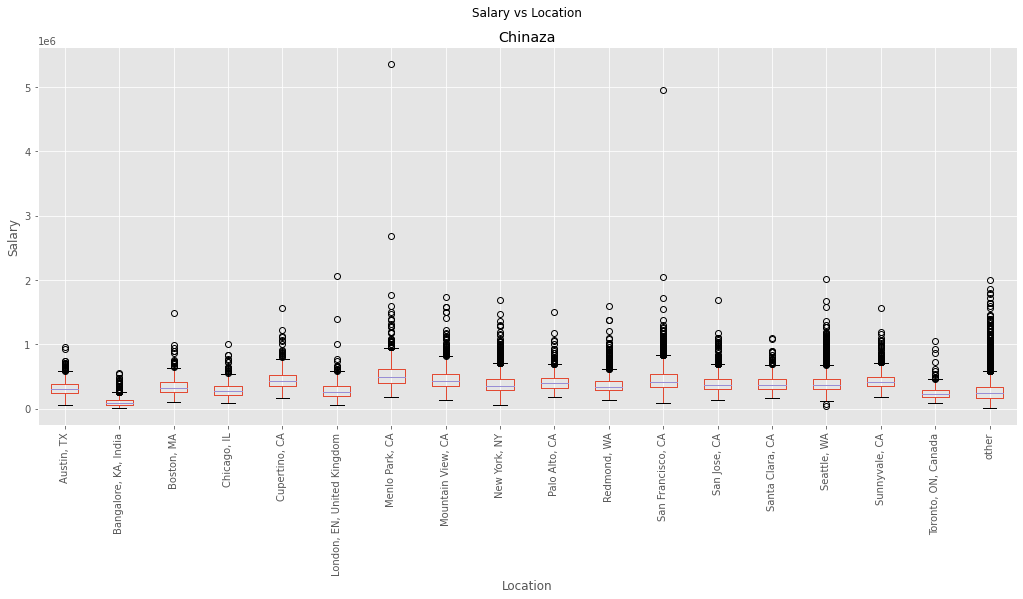

In [20]:
#inspect for outliers
fig, ax=plt.subplots(1,1,figsize=(17,7))
df_salary.boxplot('total_salary','Location',ax=ax)
plt.suptitle('Salary vs Location')
plt.title('Chinaza')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show

In [21]:
df_salary = df_salary[df_salary["total_salary"] <= 1000000]
df_salary= df_salary[df_salary["total_salary"] >= 10000]
df_salary = df_salary[df_salary['Location'] != 'other']

<function matplotlib.pyplot.show(close=None, block=None)>

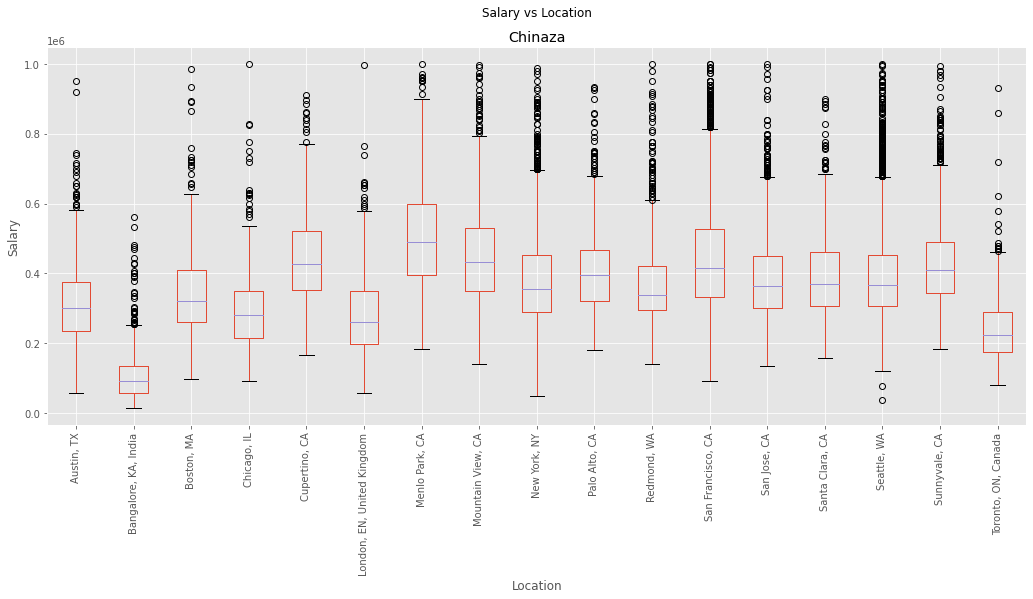

In [22]:
fig, ax=plt.subplots(1,1,figsize=(17,7))
df_salary.boxplot('total_salary','Location',ax=ax)
plt.suptitle('Salary vs Location')
plt.title('Chinaza')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show

In [23]:
#do the same for company column
df_salary['company'].value_counts()

Amazon                            2763
Microsoft                         1676
Google                            1423
Facebook                          1283
Apple                              826
                                  ... 
Genentech                            1
Juniper                              1
Moody's Analytics                    1
Cognizant Technology Solutions       1
Zeta                                 1
Name: company, Length: 967, dtype: int64

In [24]:
def shorten_categories (categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] ='other'
    return categorical_map

In [25]:
company_map = shorten_categories(df_salary.company.value_counts(),400 )
df_salary['Company'] = df_salary['company'].map(company_map)
df_salary.Company.value_counts()

other        10492
Amazon        2763
Microsoft     1676
Google        1423
Facebook      1283
Apple          826
Name: Company, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

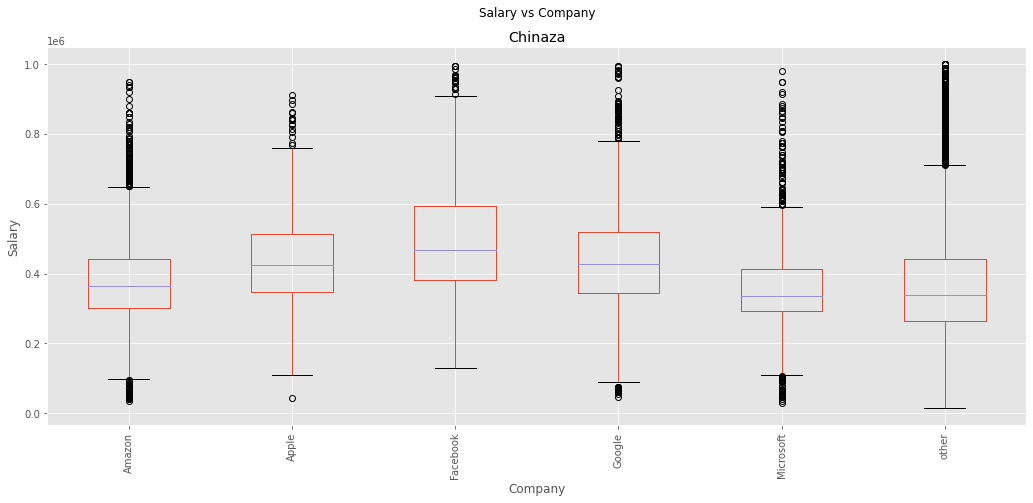

In [26]:
#inspect for outliers
fig, ax=plt.subplots(1,1,figsize=(17,7))
df_salary.boxplot('total_salary','Company',ax=ax)
plt.suptitle('Salary vs Company')
plt.title('Chinaza')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show

In [27]:

df_salary = df_salary[df_salary["total_salary"] <= 1000000]
df_salary= df_salary[df_salary["total_salary"] >= 40000]
df_salary = df_salary[df_salary['Company'] != 'other']

<function matplotlib.pyplot.show(close=None, block=None)>

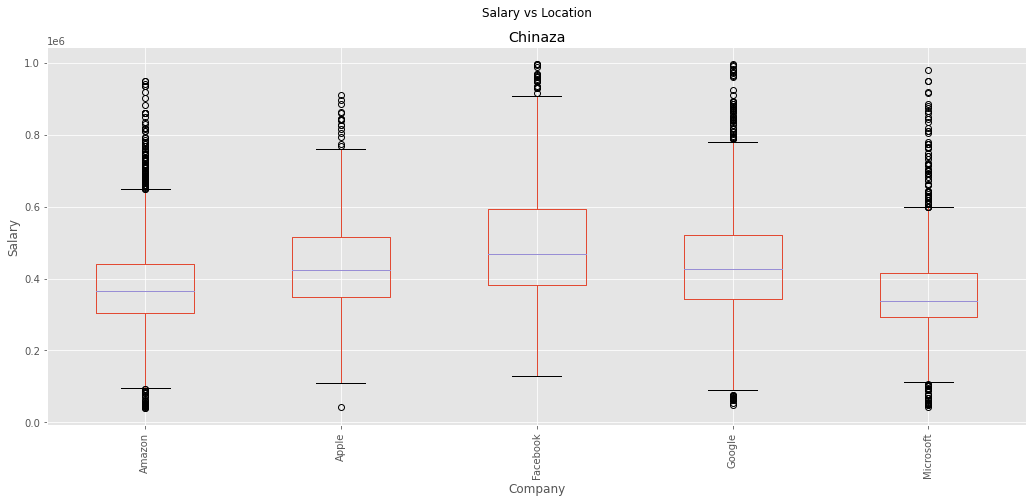

In [28]:
fig, ax=plt.subplots(1,1,figsize=(17,7))
df_salary.boxplot('total_salary','Company',ax=ax)
plt.suptitle('Salary vs Location')
plt.title('Chinaza')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show

In [29]:
#clean working_experience_years column
df_salary["working_experience_years"].unique()

array([ 4.,  1.,  3.,  0.,  5., 15.,  7.,  8.,  2.,  6., 10., 12., 20.,
       14., 13., 27., 18., 21., 11., 25., 22., 16.,  9., 23., 19., 17.,
       35., 26., 24., 30., 28., 40., 39., 36., 38., 33., 32.])

This is already converted to float so it's clean

In [30]:
#clean yearsatcompany column
df_salary["yearsatcompany"].unique()

array([ 0. ,  3. ,  1. ,  4. ,  2. , 12. ,  5. ,  8. ,  0.8,  6. , 11. ,
       10. ,  7. ,  2.5,  3.5, 13. ,  0.3,  1.5,  2.7,  9. ,  0.5,  3.7,
       15. , 14. ,  4.5,  0.6,  8.5,  2.3,  1.8, 17. , 21. , 22. , 24. ,
       20. , 27. , 16. , 28. , 23. , 18. , 19. ])

Same applies to the 'yearsatcompany' column

In [31]:
df_salary["Education"].unique()

array(['PhD', "Master's Degree", "Bachelor's Degree", 'Highschool',
       'Some College'], dtype=object)

In [32]:
#clean the education column by grouping them accordingly using a function
def clean_education (x):
    if  "Bachelor's Degree" in x:
        return  "Bachelor's Degree"
    if "Master's Degree" in x:
        return "Master's Degree"
    if 'PhD'in x:
        return 'PhD'
    else:
        return 'less than a Bachelors'
        
    
df_salary['Education'] =df_salary['Education'].apply(clean_education)
    
    

In [33]:
df_salary['Education'].unique()

array(['PhD', "Master's Degree", "Bachelor's Degree",
       'less than a Bachelors'], dtype=object)

In [34]:
#encode the columns that are of object data types using the label encoder.columns are: Education,Location, Company and Title. 
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df_salary['Education'] = le_education.fit_transform(df_salary['Education'])
df_salary['Education'].unique()


array([2, 1, 0, 3])

In [35]:
le_Location = LabelEncoder()
df_salary['Location']= le_Location.fit_transform(df_salary['Location'])
df_salary['Location'].unique()

array([ 6,  9,  4, 15, 11,  7, 14,  8, 10,  0, 13,  3,  2,  5,  1, 16, 12])

In [36]:
le_company = LabelEncoder()
df_salary['Company'] = le_company.fit_transform(df_salary['Company'])
df_salary['Company'].unique()

array([2, 0, 1, 3, 4])

In [37]:
le_title = LabelEncoder()
df_salary['title']= le_title.fit_transform(df_salary['title'])
df_salary['title'].unique()

array([11,  1,  2,  8, 12,  0,  7, 13, 10, 14,  6,  9,  5,  3,  4])

In [38]:
df_salary.head()

,company,title,location,working_experience_years,yearsatcompany,Education,total_salary,Location,Company
717,Facebook,11,"Menlo Park, CA",4.0,0.0,2,379000.0,6,2
5392,Amazon,1,"Palo Alto, CA",1.0,0.0,2,517000.0,9,0
6055,Apple,11,"Cupertino, CA",3.0,3.0,2,390000.0,4,1
7758,Google,11,"Sunnyvale, CA",0.0,0.0,2,343000.0,15,3
7997,Apple,2,"Cupertino, CA",1.0,1.0,2,322000.0,4,1


In [39]:
df_salary2 = df_salary.copy()

In [40]:
df =df_salary2.drop(['company','location'], axis =1)
df

,title,working_experience_years,yearsatcompany,Education,total_salary,Location,Company
717,11,4.0,0.0,2,379000.0,6,2
5392,1,1.0,0.0,2,517000.0,9,0
6055,11,3.0,3.0,2,390000.0,4,1
7758,11,0.0,0.0,2,343000.0,15,3
7997,2,1.0,1.0,2,322000.0,4,1
...,...,...,...,...,...,...,...
61809,11,3.0,0.0,1,487000.0,15,0
61810,11,0.0,0.0,1,277000.0,14,0
61811,11,1.0,1.0,0,302000.0,10,4
61815,11,4.0,2.0,1,341000.0,10,4


In [41]:
X = df.drop("total_salary", axis=1) #features
y = df["total_salary"] #label

In [42]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [43]:
y_pred = linear_reg.predict(X)


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))


In [45]:
error

119113.47657884764

In [46]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=6)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=6)

In [47]:
y_pred = dec_tree_reg.predict(X)

In [48]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$35,212.86


In [49]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=6)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=6)

In [50]:
y_pred = random_forest_reg.predict(X)

In [51]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$45,565.74


In [52]:
#to find the best model with the best parameter
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=6)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)


GridSearchCV(estimator=DecisionTreeRegressor(random_state=6),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [53]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$88,162.99


In [54]:
X.head() #features df

,title,working_experience_years,yearsatcompany,Education,Location,Company
717,11,4.0,0.0,2,6,2
5392,1,1.0,0.0,2,9,0
6055,11,3.0,3.0,2,4,1
7758,11,0.0,0.0,2,15,3
7997,2,1.0,1.0,2,4,1


In [55]:
#testing my model that i will use for my prediction with these 
#values:  job title, years of working experience, year(s) at company, education, location, company 


X= np.array([["Software Engineer", 2, 0,"Bachelor's Degree","San Francisco, CA","Facebook" ]])
X


array([['Software Engineer', '2', '0', "Bachelor's Degree",
        'San Francisco, CA', 'Facebook']], dtype='<U17')

In [56]:
X[:,0] = le_title.transform(X[:,0])
X[:,3] = le_education.transform(X[:,3])
X[:,4]  =le_Location .transform(X[:,4])
X[:,5]  =le_company.transform(X[:,5])
X = X.astype(float)
X



array([[11.,  2.,  0.,  0., 11.,  2.]])

In [57]:
y_pred = regressor.predict(X)
y_pred

array([378701.86335404])

In [64]:
#to save our model, we have to import pickle
import pickle

In [61]:
data = {"model": regressor, "le_title": le_title, "le_education": le_education, "le_Location":le_Location,"le_company" :le_company}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [62]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_title = data["le_title"]
le_education = data["le_education"]
le_Location =data["le_Location"]
le_company = data["le_company"]

In [63]:
#run our prediction with our loaded model
y_pred = regressor_loaded.predict(X)
y_pred

array([378701.86335404])